# Mid-term Prac for Regression Anlaysis

## Summary

In [78]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [79]:
# Load the dataset
url = 'https://stats.oarc.ucla.edu/wp-content/uploads/2016/02/p081.txt'
# Tab separated data
data = pd.read_csv(url, sep="\t", index_col="State")

In [80]:
# Check the shape of the data
data.shape

(51, 7)

In [81]:
# Display the first 5 rows
data.head(5)

,Age,HS,Income,Black,Female,Price,Sales
State,,,,,,,
AL,27.0,41.3,2948.0,26.2,51.7,42.7,89.8
AK,22.9,66.7,4644.0,3.0,45.7,41.8,121.3
AZ,26.3,58.1,3665.0,3.0,50.8,38.5,115.2
AR,29.1,39.9,2878.0,18.3,51.5,38.8,100.3
CA,28.1,62.6,4493.0,7.0,50.8,39.7,123.0


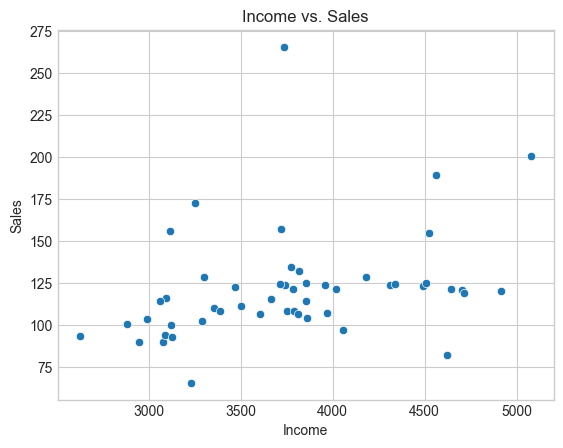

In [82]:
# basic plotting method
# visualize the data (Income과 Sales의 관계에 대하여 시각화)
sns.scatterplot(data, x="Income", y="Sales")
plt.title("Income vs. Sales")
plt.xlabel("Income")
plt.ylabel("Sales")
plt.show()

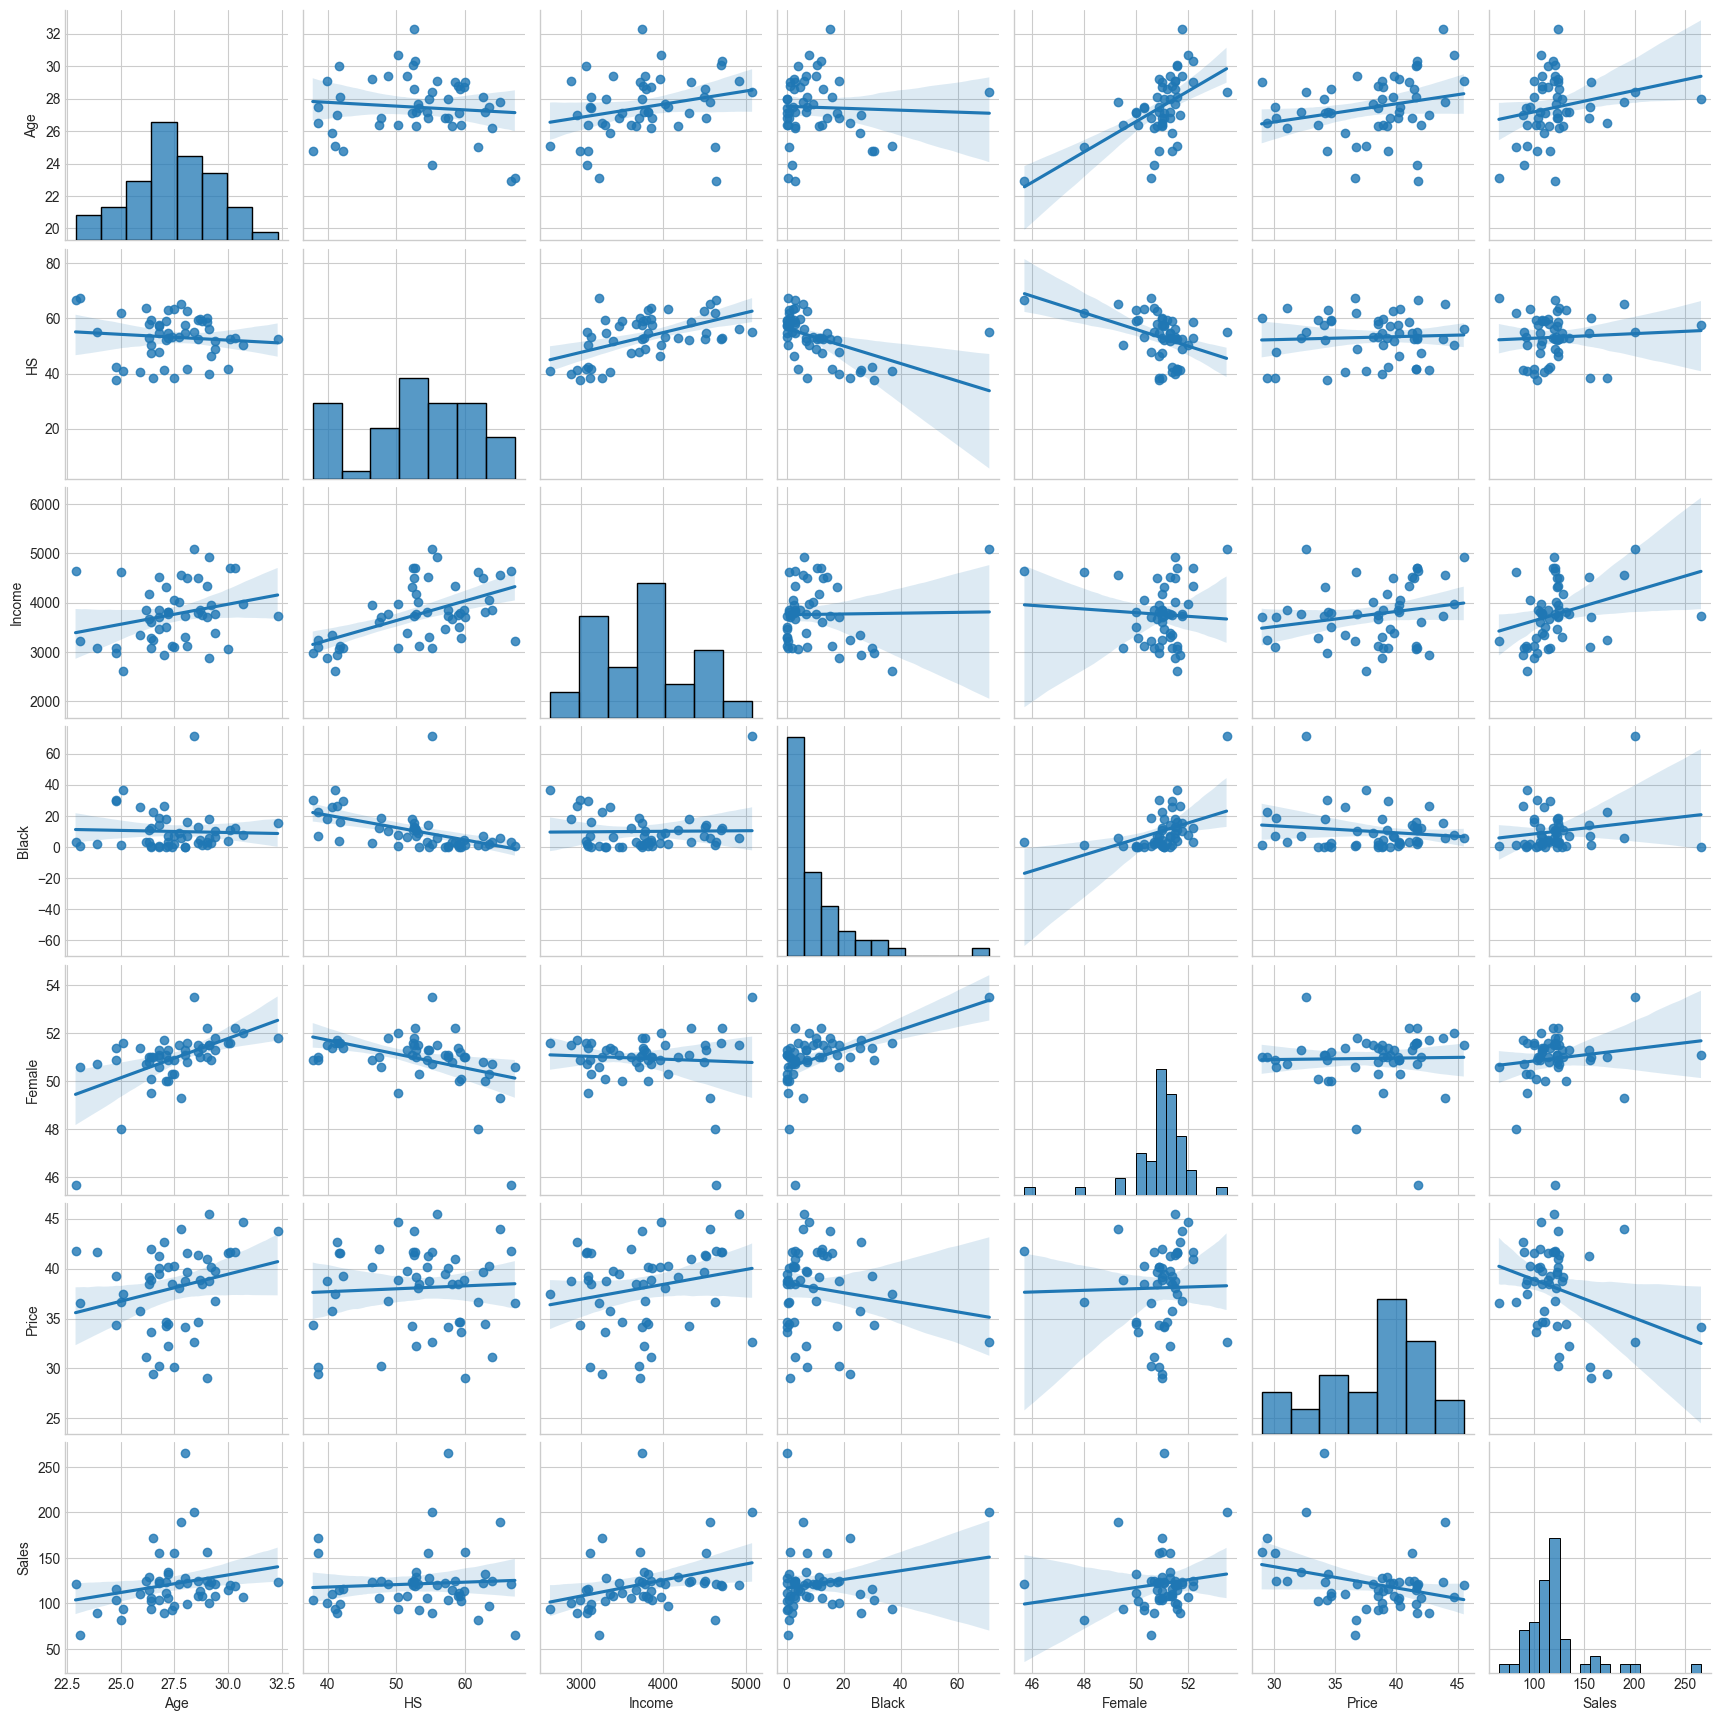

In [83]:
# visualize all pairwise relationships. (diagonal & off-diagonal)
sns.pairplot(data, kind="reg")

In [84]:
# Simple Linear Regression with Statsmodels
import statsmodels.api as sm

# Set up the OLS Model
# y=ax y절편을 위해 상수항 추가
X = sm.add_constant(data["Income"])
y = data["Sales"]
# Least Square Estimator
model = sm.OLS(y, X).fit()

# Print the summary of the regression model
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.106
Model:                            OLS   Adj. R-squared:                  0.088
Method:                 Least Squares   F-statistic:                     5.829
Date:                Mon, 30 Oct 2023   Prob (F-statistic):             0.0195
Time:                        18:03:41   Log-Likelihood:                -245.86
No. Observations:                  51   AIC:                             495.7
Df Residuals:                      49   BIC:                             499.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         55.3625     27.743      1.996      0.0

## 

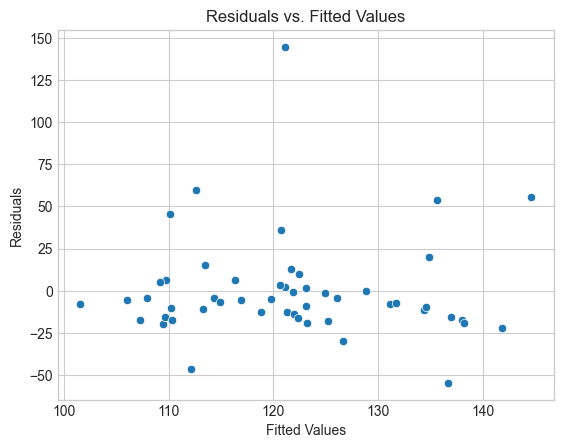

In [85]:
# Model Diagnostics
# Residuals vs. Fitted values plot
sns.scatterplot(x=model.fittedvalues, y=model.resid)
plt.title("Residuals vs. Fitted Values")
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.show()

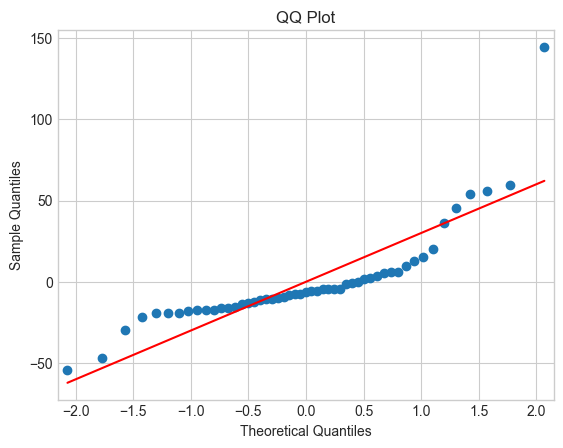

In [86]:
# QQ plot to check for normality of residuals (residual의 정규성 검사)
sm.qqplot(model.resid, line="s")
plt.title("QQ Plot")
plt.show()

In [87]:
# Multi-Linear Regression
# Investigate which variable to recruit
data.corr()

,Age,HS,Income,Black,Female,Price,Sales
Age,1.000000,-0.098916,0.256581,-0.040330,0.553032,0.247757,0.226555
HS,-0.098916,1.000000,0.534005,-0.501712,-0.417378,0.056975,0.066695
Income,0.256581,0.534005,1.000000,0.017288,-0.068827,0.214557,0.326068
Black,-0.040330,-0.501712,0.017288,1.000000,0.450900,-0.147776,0.189590
Female,0.553032,-0.417378,-0.068827,0.450900,1.000000,0.022474,0.146221
Price,0.247757,0.056975,0.214557,-0.147776,0.022474,1.000000,-0.300623
Sales,0.226555,0.066695,0.326068,0.189590,0.146221,-0.300623,1.000000


In [90]:
# Recruit another variable Price
X_multi = sm.add_constant(data[["Income", "Price"]])
model_multi = sm.OLS(y, X_multi).fit()
print(model_multi.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.250
Model:                            OLS   Adj. R-squared:                  0.219
Method:                 Least Squares   F-statistic:                     8.012
Date:                Mon, 30 Oct 2023   Prob (F-statistic):           0.000994
Time:                        18:13:17   Log-Likelihood:                -241.38
No. Observations:                  51   AIC:                             488.8
Df Residuals:                      48   BIC:                             494.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        153.3384     41.239      3.718      0.0

# Model Assumptions and Advanced Diagnostics

*   **Check for linearity**: The relationship between predictors and response should be linear.
*   **Check for independence**: Observations should be independent of each other.
*   **Check for homoscedasticity**: The variance of residuals should remain constant.
*   **Check for normality**: The residuals should follow a normal distribution.

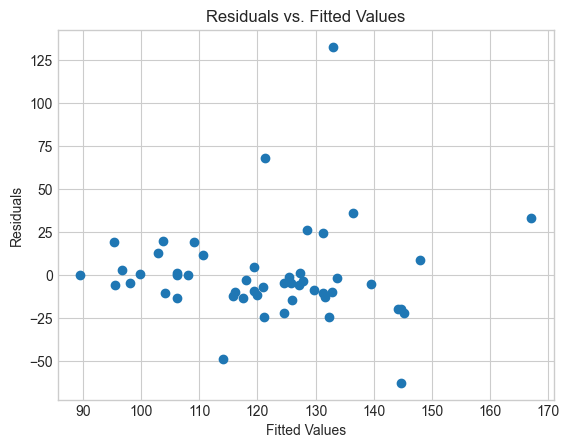

In [92]:
# visualizing the residuals
plt.scatter(model_multi.fittedvalues, model_multi.resid)
plt.title("Residuals vs. Fitted Values")
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.show()

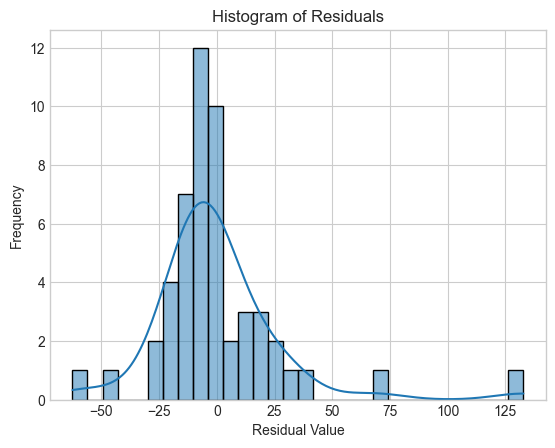

In [93]:
# Regression Diagnostics - Checking Normality of Resid with Seaborn
sns.histplot(model_multi.resid, bins=30, kde=True)
plt.title("Histogram of Residuals")
plt.xlabel("Residual Value")
plt.ylabel("Frequency")
plt.show()

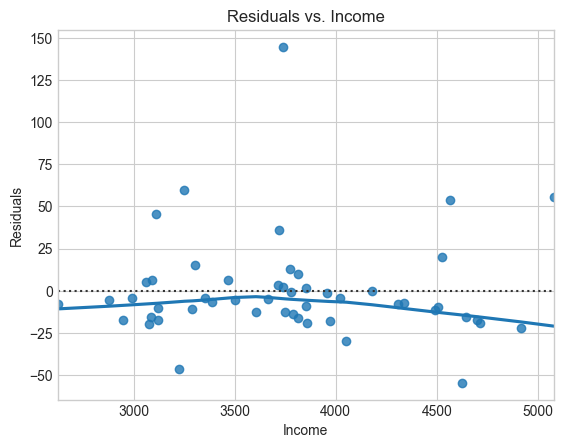

In [94]:
# Model Assumptions - Checking Linearity with Seaborn
sns.residplot(x=data["Income"], y=model.resid, data=data, lowess=True)
plt.title("Residuals vs. Income")
plt.xlabel("Income")
plt.ylabel("Residuals")
plt.show()

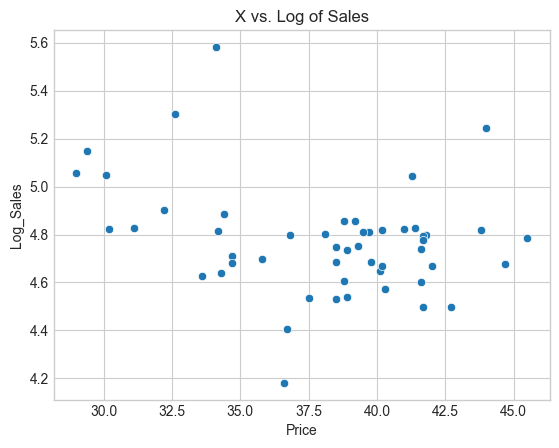

In [95]:
# Transformations - Log Transformation & Visualization with Seaborn
data["Log_Sales"] = np.log(data["Sales"])
sns.scatterplot(data=data, x="Price", y="Log_Sales")
plt.title("X vs. Log of Sales")
plt.show()

In [97]:
# Model with transformed value
X_log = sm.add_constant(data["Income"])
y_log = data["Log_Sales"]
model_log = sm.OLS(y_log, X_log).fit()
print(model_log.summary())

                            OLS Regression Results                            
Dep. Variable:              Log_Sales   R-squared:                       0.138
Model:                            OLS   Adj. R-squared:                  0.120
Method:                 Least Squares   F-statistic:                     7.832
Date:                Mon, 30 Oct 2023   Prob (F-statistic):            0.00732
Time:                        18:20:27   Log-Likelihood:                 7.1933
No. Observations:                  51   AIC:                            -10.39
Df Residuals:                      49   BIC:                            -6.523
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.2356      0.194     21.810      0.0

## Simple Linear Regression Analysis

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels
import statsmodels.api as sm
import sklearn
from sklearn.model_selection import train_test_split

%matplotlib inline
plt.style.use('seaborn-whitegrid')

/var/folders/5r/bcxwxb6x521399lvd_5y9jwm0000gn/T/ipykernel_84858/3372876918.py:12: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


In [11]:
rng = np.random.RandomState(1)
x = 10 * rng.rand(50)
print(x.shape)

(50,)


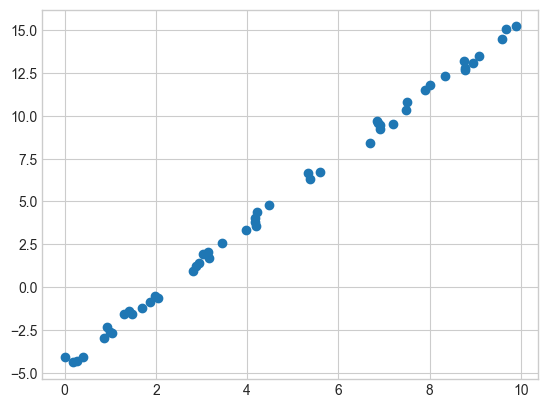

In [27]:
y = 2 * x - 5 + rng.rand(50)
plt.scatter(x, y);

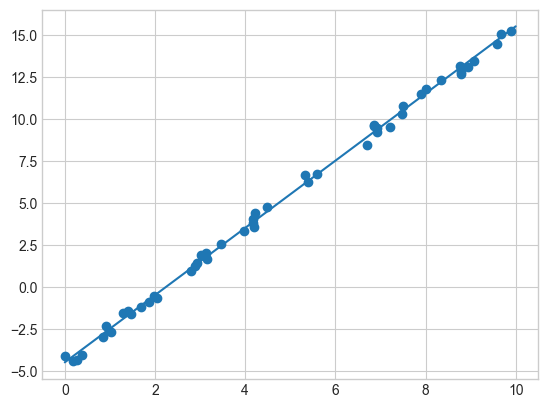

In [28]:
from sklearn.linear_model import LinearRegression
# initialize
model = LinearRegression(fit_intercept=True)

# np.newaxis: 존재하는 numpy array의 차원을 늘려준다.
model.fit(x[:, np.newaxis], y)

xfit = np.linspace(0, 10, 100)
yfit = model.predict(xfit[:, np.newaxis])

# x, y에 대한 scatter plot을 그린다.
plt.scatter(x, y)
# plot x, y using default line style and color
plt.plot(xfit, yfit)

In [29]:
print("Model {:<10}: {:<5}".format("slope", round(model.coef_[0],2)))
print("Model {:<10}: {:<5}".format("intercept", round(model.intercept_,2)))

Model slope     : 2.0  
Model intercept : -4.47


In [30]:
adv = pd.read_csv("https://raw.githubusercontent.com/rkmishracs/dataset/main/advertising.csv")
adv.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [32]:
adv.shape

(200, 4)

In [33]:
adv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [34]:
adv.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


<Axes: xlabel='TV', ylabel='Sales'>

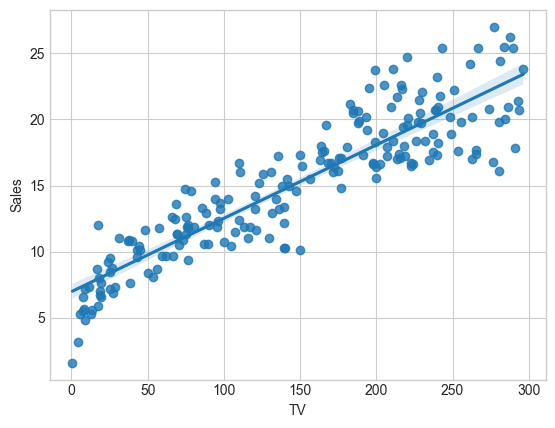

In [36]:
# regplot => scatterplot와 그의 경향성을 보여주는 lineplot을 합쳐놓은 그래프
# x축에 TV, y축에 Sales, data는 adv
sns.regplot(x="TV", y="Sales", data=adv)

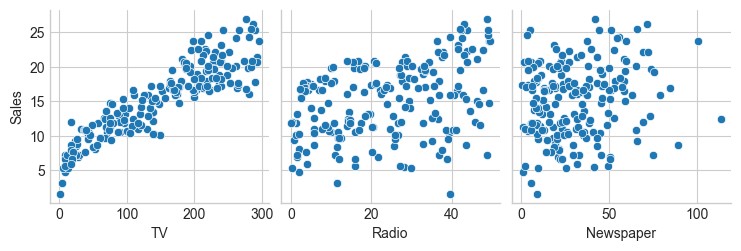

In [37]:
# pairplot => x축 (all predictors), y축 (target variable)
sns.pairplot(data=adv, x_vars=["TV", "Radio", "Newspaper"], y_vars="Sales")

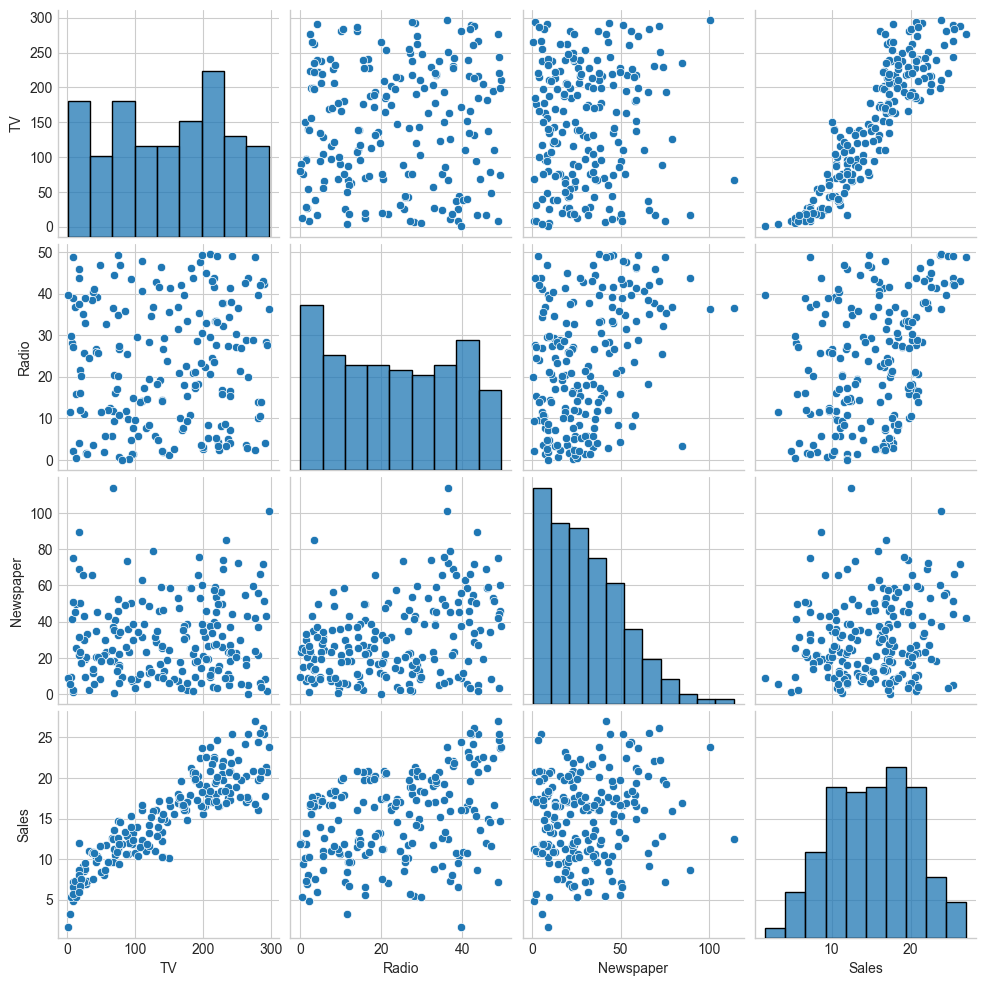

In [38]:
sns.pairplot(data=adv)

In [39]:
# Pearson's correlation coefficient
# Spearman's correlation coefficient
adv.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.901208
Radio,0.054809,1.000000,0.354104,0.349631
Newspaper,0.056648,0.354104,1.000000,0.157960
Sales,0.901208,0.349631,0.157960,1.000000


In [40]:
# create X, y
X = adv["TV"]
y = adv["Sales"]

# create Train and Test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=100)

In [41]:
X_train_sm = sm.add_constant(X_train)
X_train_sm.head()

,const,TV
74,1.0,213.4
3,1.0,151.5
185,1.0,205.0
26,1.0,142.9
90,1.0,134.3


In [42]:
# Training(fitting) the model
# sm: statsmodel.OLS (Ordinary Least Squares)
lr = sm.OLS(y_train, X_train_sm)
lr_model = lr.fit()
lr_model.params

const    6.948683
TV       0.054546
dtype: float64

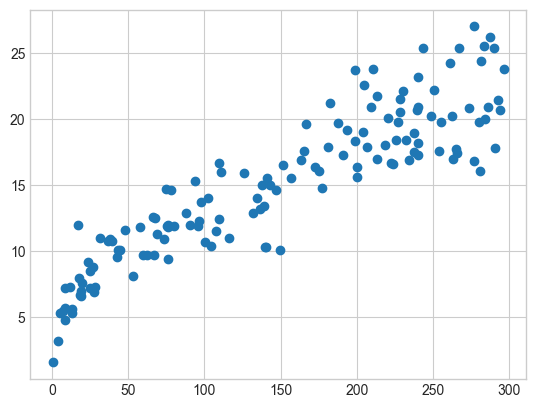

In [44]:
# draw a scatter plot
plt.scatter(X_train, y_train)

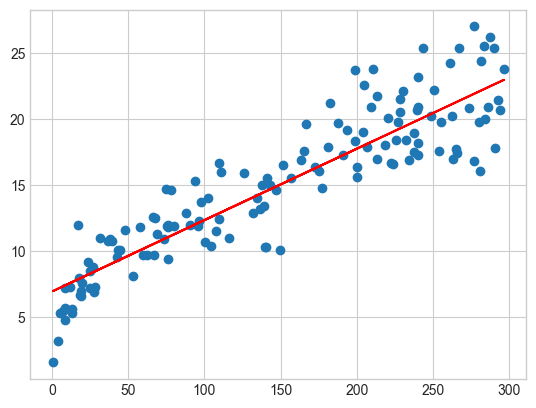

In [45]:
# Scatter plot with regression line
plt.scatter(X_train, y_train)
plt.plot(X_train, 6.948+0.054*X_train, "r")
plt.show()

In [46]:
# Calculate the residuals
y_train_pred = lr_model.predict(X_train_sm)
residual = y_train - y_train_pred
print(residual. sum())
print(residual)

4.707345624410664e-13
74    -1.588747
3      1.287635
185    4.469437
26     0.256729
90    -0.274178
         ...   
87     3.013102
103    2.502170
67    -1.146907
24    -0.646884
8     -2.617777
Length: 140, dtype: float64


Text(0.5, 1.0, 'Residual Plot')

<Figure size 640x480 with 0 Axes>

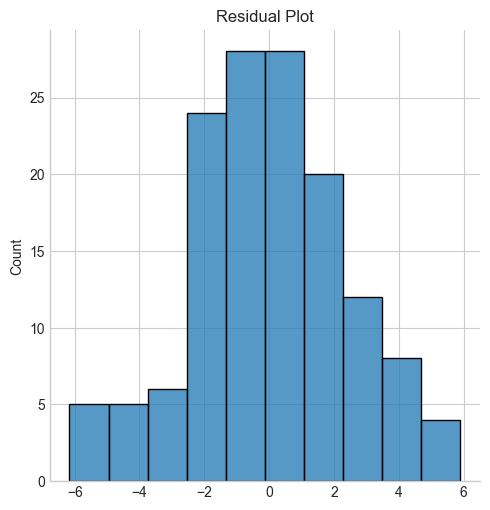

In [47]:
# plot the residials histogram
plt.figure()
sns.displot(residual)
plt.title("Residual Plot")

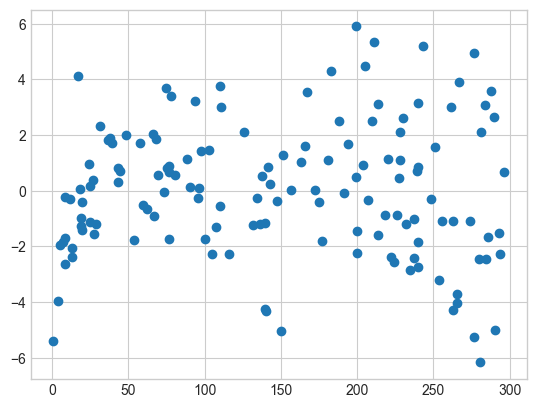

In [48]:
plt.scatter(X_train, residual)
plt.show()

In [49]:
# OLS
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     611.2
Date:                Mon, 30 Oct 2023   Prob (F-statistic):           1.52e-52
Time:                        17:28:08   Log-Likelihood:                -321.12
No. Observations:                 140   AIC:                             646.2
Df Residuals:                     138   BIC:                             652.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.9487      0.385     18.068      0.000       6.188       7.709
TV             0.0545      0.002     24.722      0.000       0.050       0.059
==============================================================================
Omnibus:                        0.027   Durbin-Watson:                   2.196
Prob(Omnibus):                  0.987   Jarque-Bera (JB):                0.150
Skew:                          -0.006   Prob(JB):                        0.928
Kurtosis:                       2.840   Cond. No.                         328.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [58]:
from sklearn.model_selection import train_test_split
from scipy import stats

X_train_lm, X_test_lm, y_train_lm, y_test_lm = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100 )

In [59]:
X_train_lm = X_train_lm.values.reshape(-1,1)
X_test_lm = X_test_lm.values.reshape(-1,1)

print(X_train_lm.shape)
print(y_train_lm.shape)
print(X_test_lm.shape)
print(y_test_lm.shape)

(140, 1)
(140,)
(60, 1)
(60,)


In [61]:
from sklearn.linear_model import LinearRegression

# Representing Linear Regression as lm
# Creating Linear Regression Object
lm = LinearRegression()

# Fit the model using lr.fit()
lm.fit(X_train_lm, y_train_lm)
print(lm.intercept_)
print(lm.coef_)

6.948683200001362
[0.05454575]


In [62]:
coefficients = lm.coef_
mse_resid = np.mean((lm.predict(X_train_lm) - y_train_lm) ** 2)

In [63]:
# Calculate the standard error of each coefficient
n = len(y_train_lm)
k = len(X_train_lm[0])
std_err = np.sqrt(mse_resid / (n-k) * np.diag(np.linalg.inv(np.dot(X_train_lm.T, X_train_lm))))

In [65]:
# Calculate the confidence interval for each coefficient
alpha = 0.05
t_value = stats.t.ppf(1-alpha/2, n-k)
conf_int = np.vstack((coefficients - t_value * std_err, coefficients + t_value * std_err)).T
print(conf_int)

[[0.05435073 0.05474078]]


In [66]:
# residuals
prediction = lm.predict(X_test_lm)
residual = (y_test_lm - prediction)

In [68]:
from sklearn.metrics import mean_squared_error, r2_score

# The mean squared error
print("Mean Squared Error (MSE): %.2f" % mean_squared_error(y_test_lm, prediction))
# The coefficient of determination : 1 is perfect prediction
print("Coefficient of determination (R2): %.2f" % r2_score(y_test_lm, prediction))

Mean Squared Error (MSE): 4.08
Coefficient of determination (R2): 0.79


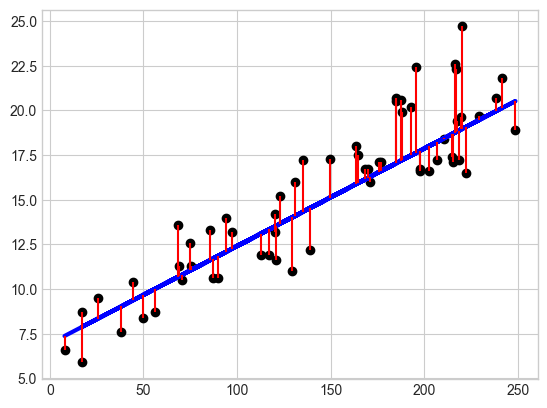

In [69]:
# plot regression line with residuals
plt.scatter(X_test_lm, y_test_lm, color="black")
plt.plot(X_test_lm, prediction, color="blue", linewidth=3)
plt.vlines(X_test_lm, prediction, y_test_lm, color='r')

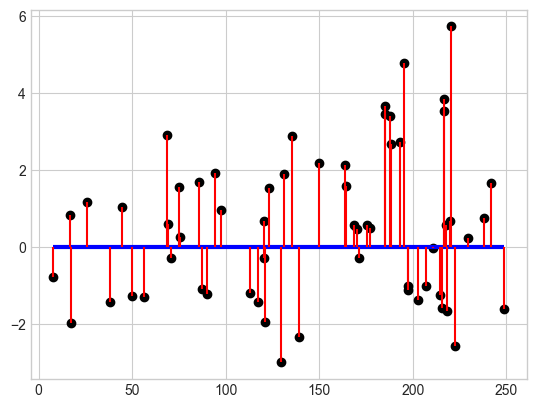

In [70]:
# residual plot
plt.scatter(X_test_lm, y_test_lm - prediction, color="black")
plt.hlines(0, min(X_test_lm), max(X_test_lm), color="blue", linewidth=3)
plt.vlines(X_test_lm, 0, y_test_lm - prediction, color="r")

## Multi-Linear Regression Analysis

In [99]:
# Import libraries
## Basic libs
import pandas as pd
import numpy as np
import warnings
## Building Model
from sklearn import linear_model
from scipy import stats
import statsmodels
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
from statsmodels.compat import lzip
## Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = (7, 7)
plt.style.use('ggplot')

# Load dataset
df_pie = pd.read_csv('https://raw.githubusercontent.com/rafiag/DTI-Linear-Regression/main/data/pie-sales.csv',
                     index_col='week', sep=';')

In [100]:
print(df_pie.shape)
df_pie

(15, 3)


,pie_sales,price,advertising
week,,,
1,350,5.5,3.3
2,460,7.5,3.3
3,350,8.0,3.0
4,430,8.0,4.5
5,350,6.8,3.0
6,380,7.5,4.0
7,430,4.5,3.0
8,470,6.4,3.7
9,450,7.0,3.5


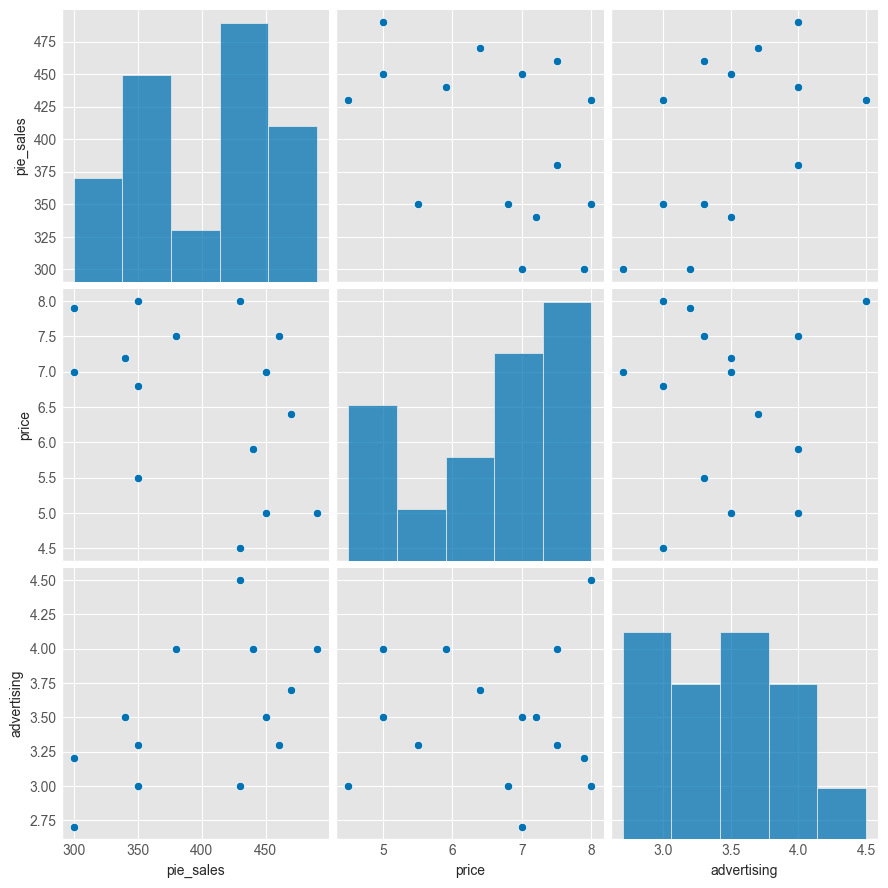

In [103]:
# Descriptive Analysis
# visualize the data using scatter plot and histogram
sns.set_palette('colorblind')
sns.pairplot(data=df_pie, height=3)

In [106]:
X = df_pie[['price', 'advertising']]
y = df_pie['pie_sales']

reg = linear_model.LinearRegression()
model = reg.fit(X, y)

print('Intercept:', model.intercept_)
print('Coefficients:', model.coef_)

Intercept: 306.52619328374357
Coefficients: [-24.97508952  74.13095749]


In [107]:
price = input('What is the price of the pie? \n')
advertising = input('How much money are you going to spend for advertising? \n')

try:
    print('We predict {:.0f} pies will be sold if we sold the pie at ${} and spend ${} at advertising.'.format(
        model.predict([[float(price), float(advertising)]])[0],
        price,
        advertising))
except ValueError:
    print('Please only input either:\n- whole number e.g. 1, 4, 7\n- decimal/float number e.g. 3.8')

We predict -194 pies will be sold if we sold the pie at $23 and spend $1 at advertising.


$R^2$는 0과 1 사이의 범위를 가집니다. 여기서 $R^2=0$은 변수 간에 선형 관계가 없음을 의미하고 $R^2=1$은 완벽한 선형 관계를 나타냅니다. 
우리의 경우, 우리는 대략 $R^2$ 점수 0.5214를 얻었는데, 이는 우리의 독립 변수를 사용하여 종속 변수의 52.14%를 설명할 수 있음을 의미합니다.

F-검정 또는 다중 선형 회귀에서의 ANOVA (분산 분석)는 우리의 복잡한 모델이 더 간단한 모델(예: 오직 하나의 독립 변수만 있는 모델)보다 더 나은 성능을 내는지 확인하는 데 사용할 수 있습니다. 
F-검정을 사용하면 모델이 얻은 값만큼 높은 F-통계량을 관측할 확률을 계산하여 모델의 유의성을 평가할 수 있습니다. 
$R^2$ 점수와 마찬가지로 우리는 모델의 .fvalue 및 `.f_pvalue` 속성에 접근하여 F-통계량 및 해당 F-통계량의 확률을 쉽게 얻을 수 있습니다.
Because our f_pvalue is lower than 0.05 **we can conclude that our model performs better than other simpler model.**

t-통계량은 계수를 그것의 표준 오차로 나눈 값입니다. 
표준 오차는 계수의 표준 편차의 추정치로, 경우에 따라 얼마나 변하는지를 나타냅니다. 이는 회귀 계수가 측정되는 정확도의 척도로 생각할 수 있습니다. 
F-검정과 마찬가지로 *p*-value는 우리 모델이 가진 것처럼 극단적인 결과를 보는 확률을 나타냅니다. 
또한 모델에서 `.pvalues` 속성을 호출하여 모든 변수에 대한 *p*-value를 얻을 수 있습니다.
우리의 두 독립 변수인 가격과 광고 모두 p-값이 0.05보다 작은데, **이는 가격과 광고가 파이 판매에 영향을 미친다는 충분한 증거가 있다는 것을 보여줍니다.**

다음으로 가설검정 중, 우리는 잔차 분석(residual analysis)을 통해 우리의 모델을 검증하겠습니다. 아래는 우리의 모델의 유효성을 확인하기 위해 할 테스트 또는 가정의 목록입니다:
1.   선형성(Linearity)
2.   정규성(Normality)
3.   다중공선성(Multicollinearity)
4.   자기상관성(Autocorrelation)
5.   등분산성(Homoscedasticity)
잔차는 관측값(observed value)과 데이터셋에서 예측값(predicted value) 간의 차이입니다. 
statsmodel을 사용하면 모델의 `.resid` 속성에 단순히 접근함으로써 우리 모델의 잔차 값을 쉽게 얻을 수 있으며 그런 다음 우리의 `df_pie` 데이터프레임에 'residual'이라는 새로운 열에 그 값을 유지할 수 있습니다.

선형성(Linearity)
이것은 독립 변수(independent variables)와 종속 변수(dependent variable) 사이에 선형 관계(linear relationship)가 있다고 가정합니다. 
우리의 경우 여러 독립 변수가 있기 때문에 실제 값 대비 예측 값을 보기 위해 산점도(scatter plot)를 사용하여 이것을 할 수 있습니다.
산점도(scatter plot)는 대각선(diagonal line) 주변에 균일하게 퍼진 잔차 점(residual point)을 보여줍니다. 
**따라서 우리는 독립 변수(independent variable)와 종속 변수(dependent variable) 사이에 선형 관계(linear relationship)가 있다고 가정할 수 있습니다.**

정규성(Normality)
이것은 모델의 오류 항(error terms)이 정규 분포를 따르는 것으로 가정합니다. 
우리는 잔차의 히스토그램을 통해 정규성을 검사하고 Anderson-Darling 정규성 테스트의 *p*-value를 동시에 보며 잔차의 정규성을 검사하겠습니다. 
우리는 *p*-value를 계산하기 위해 statsmodel의 `normal_ad()` 함수를 사용하고 그것을 0.05의 임계값(threshold)과 비교할 것입니다. 
만약 우리가 얻은 *p*-value가 임계값(threshold)보다 높다면, 우리는 우리의 잔차가 정규 분포되어 있다고 가정할 수 있습니다.
위의 코드에서 우리는 0.6644의 *p*-value를 얻었는데, 이는 0.05의 임계값(threshold)보다 높기 때문에 정규로 간주될 수 있습니다. 
히스토그램 그래프 역시 정규 분포를 보여줍니다 (우리의 데이터셋에 15개의 관찰만 있기 때문에 약간 치우쳐 보일 수도 있습니다). 
**이 두 결과 모두에서 우리는 우리의 잔차가 정규 분포되어 있다고 가정할 수 있습니다.**

다중공선성(Multicollinearity)
이것은 회귀에 사용되는 예측 변수들이 서로 상관되어 있지 않다고 가정합니다. 
예측 변수 간의 어떤 상관관계가 있는지 확인하기 위해 Pandas 데이터프레임의 `corr()` 함수를 사용하여 데이터의 각 열 사이의 Pearson 상관 계수를 계산할 수 있습니다. 
그런 다음 Seaborn의 `heatmap()` 함수를 사용하여 그것을 히트맵으로 표시할 수 있습니다.
이 이미지는 광고와 pie_sales 사이에 어느 정도의 양의 상관관계가 있으며, 가격과 pie_sales 사이에는 음의 상관관계가 있음을 보여줍니다. 
이 두 결과 모두 이전의 결과 모델을 지지합니다. 가장 중요한 점은, 가격과 광고가 거의 0의 상관 계수를 가지고 있다는 것입니다. 
**이것은 우리의 두 독립 변수가 서로 영향을 주지 않으며, 우리의 데이터에 다중공선성(multicollinearity)이 없다는 것을 의미합니다.**

자기상관성(Autocorrelation)
자기상관은 시간에 따른 오차(잔차; residuals)의 상관 관계입니다. 
시간에 따라 데이터가 수집될 때 자기상관(autocorrelation)이 존재하는지 확인하기 위해 사용됩니다. 한 시간대의 잔차가 다른 시간대의 잔차와 관련되어 있으면 자기상관이 존재합니다. 
우리는 Durbin-Watson 테스트를 수행하여 양의 상관 관계 또는 음의 상관 관계가 존재하는지 확인할 수 있습니다. 
이 단계에서는 statsmodel의 `durbin_watson()` 함수를 사용하여 Durbin-Watson 점수를 계산하고 다음 조건으로 값을 평가합니다:
*   Durbin-Watson 점수가 1.5 미만이면 양의 자기상관이 있으며 가정이 만족되지 않습니다.
*   Durbin-Watson 점수가 1.5에서 2.5 사이이면 자기상관이 없으며 가정이 만족됩니다.
*   Durbin-Watson 점수가 2.5보다 크면 음의 자기상관이 있으며 가정이 만족되지 않습니다.

등분산성(Homoscedasticity)
이것은 오차항(error term)에 동일한 분산이라는 등분산성(homoscedasticity)을 가정합니다. 
등분산성을 위반하는 이분산성(heteroscedasticity)은 오차항 간에 균등한 분산이 없을 때 발생합니다. 
등분산성을 감지하기 위해 잔차를 그래프(residual plot)로 그려 분산이 균일해 보이는지 확인할 수 있습니다.
우리는 오직 15개의 data point만 가지고 있지만, 우리의 잔차는 일정하고 균일한 분산을 가지고 있는 것 같습니다. 
따라서 등분산성 가정이 만족된다고 가정할 수 있습니다.

결론(Conclusion)
우리의 모델은 모델 검증 단계의 모든 테스트를 성공적으로 통과했으므로, 가격과 광고라는 두 개의 독립 변수를 사용하여 미래의 파이 판매량을 잘 예측할 수 있을 것이라고 결론 내릴 수 있습니다. 
그러나 여전히 우리의 모델은 $R^2$ 점수가 52.14%로, 파이 판매량에 영향을 주는 알려지지 않은 요인이 약 48%나 된다는 것을 의미합니다.

## Homework

In [109]:
import pandas as pd
import statsmodels.api as sm

data_table1 = pd.read_csv("table1.txt", sep='\t')

y = data_table1['y']
x8 = data_table1['X8']
x8 = sm.add_constant(x8)
model = sm.OLS(y,x8).fit()
model.params

model.summary()

slope_ci = model.conf_int().loc['X8']
slope_ci

# The answer to this question is provided by the $R^2$ value, which was found to be 0.545 or 54.5% from the regression output.

prediction = model.get_prediction(exog=[1, 2000])
ci_mean = prediction.conf_int()
ci_mean

data_table2 = pd.read_csv("table2.txt", sep='\t')
data_table2.head()

y_heat_flux = data_table2['y']
x4_radial_deflection = data_table2['x4']
x4_radial_deflection = sm.add_constant(x4_radial_deflection)
model_heat_flux = sm.OLS(y_heat_flux, x4_radial_deflection).fit()
model_heat_flux.params

model_heat_flux.summary()

slope_ci_99 = model_heat_flux.conf_int(alpha=0.01).loc['x4']
slope_ci_99

r_squared = model_heat_flux.rsquared
r_squared

prediction_heat_flux = model_heat_flux.get_prediction(exog=[[1, 16.5]])
ci_mean_heat_flux = prediction_heat_flux.conf_int()
ci_mean_heat_flux

array([[249.14675201, 258.77865527]])